In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial.distance import euclidean
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE




In [21]:
# load the data
digits = load_digits()

# get the data and labels
X, y = digits.data, digits.target

# split into train and temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# split temp into test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42)

In [22]:
def evaluate(y_pred, y_gt):
    return np.sum(y_pred == y_gt) / float(len(y_gt))


In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=4, method='exact', random_state=42)

# transform the datasets
X_train_TSNE = tsne.fit_transform(X_train)
X_test_TSNE = tsne.fit_transform(X_test)
X_val_TSNE = tsne.fit_transform(X_val)

In [31]:
import numpy as np
from collections import Counter
from scipy.spatial.distance import euclidean
import pandas as pd
from sklearn.metrics import accuracy_score


class KNeighborsClassifier:
    def __init__(self, n_neighbors, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = self.calculate_distance(x, x_train)
                distances.append((i, distance))
            distances.sort(key=lambda x: x[1])
            neighbors_indices = [index for index, _ in distances[:self.n_neighbors]]
            neighbors_labels = [self.y_train[index] for index in neighbors_indices]
            y_pred.append(max(set(neighbors_labels), key=neighbors_labels.count))
        return y_pred

    def calculate_distance(self, x1, x2):
        if self.metric == 'euclidean':
            if isinstance(x1, float):
                x1 = np.array([x1])
            if isinstance(x2, float):
                x2 = np.array([x2])
            return euclidean(x1, x2)


In [32]:
k_values = [1, 4, 8, 16]

scores = {}

# Implement k-NN classifier and evaluate for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_TSNE, y_train)

    y_val_pred = knn.predict(X_val_TSNE)

    scores[k] = accuracy_score(y_val, y_val_pred)

# Print scores
for k, score in scores.items():
    print(f"k={k}, Accuracy={score}")

k=1, Accuracy=0.30532212885154064
k=4, Accuracy=0.31092436974789917
k=8, Accuracy=0.3137254901960784
k=16, Accuracy=0.3165266106442577


In [33]:
# Create a k-NN classifier with the optimal hyperparameter k, train it, and make predictions
knn_optimal = KNeighborsClassifier(n_neighbors=10)
knn_optimal.fit(X_train_TSNE, y_train)
y_test_pred = knn_optimal.predict(X_test_TSNE)

# Evaluate the performance
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Test accuracy: 0.09289617486338798


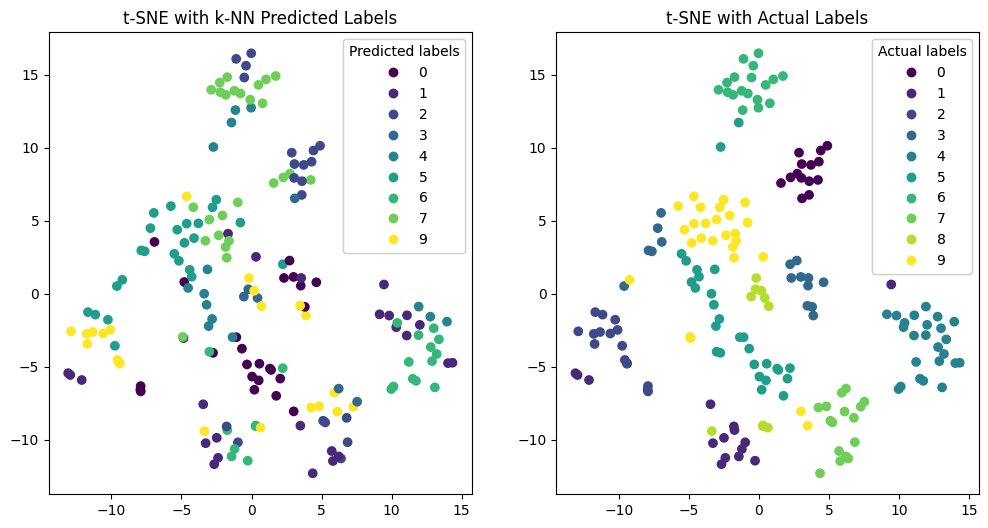

In [34]:
# Apply t-SNE
tsne_2d = TSNE(n_components=2, random_state=42)
X_test_TSNE_2d = tsne_2d.fit_transform(X_test)



# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for predicted labels
scatter = ax[0].scatter(X_test_TSNE_2d[:, 0], X_test_TSNE_2d[:, 1], c=y_test_pred)
legend1 = ax[0].legend(*scatter.legend_elements(), title="Predicted labels")
ax[0].add_artist(legend1)
ax[0].title.set_text('t-SNE with k-NN Predicted Labels')

# Subplot for actual labels
scatter = ax[1].scatter(X_test_TSNE_2d[:, 0], X_test_TSNE_2d[:, 1], c=y_test)
legend1 = ax[1].legend(*scatter.legend_elements(), title="Actual labels")
ax[1].add_artist(legend1)
ax[1].title.set_text('t-SNE with Actual Labels')

plt.show()